# Laptop Price Analysis

## Objective
To analyze laptop specifications and build a machine learning model
that predicts laptop prices based on hardware features.


## 📦 Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 📂 Load the Dataset


In [ ]:

df = pd.read_csv('../data/Laptop Price Dataset.csv')
df.head()


## 👀 Preview the Dataset


In [ ]:
df.head()


## 📐 Check Dataset Shape


In [ ]:
df.shape


## 🧾 Dataset Information Summary


In [ ]:
df.info()


## 🏷️ List Dataset Columns


In [ ]:
df.columns

## 📊 Statistical Summary of Numerical Features


In [ ]:
df.describe()


## ✅ Conclusion
At this stage:

Dataset structure is understood

Features are identified

Data is ready for cleaning and preprocessing

## 🧼 Check for Missing Values


In [ ]:
df.isnull().sum()


### Observation
The dataset does not contain any missing values.


## 📊 Laptop Brand Distribution


## Purpose: This visualization shows the number of laptops available for each brand in the dataset, helping to understand brand representation and data balance.

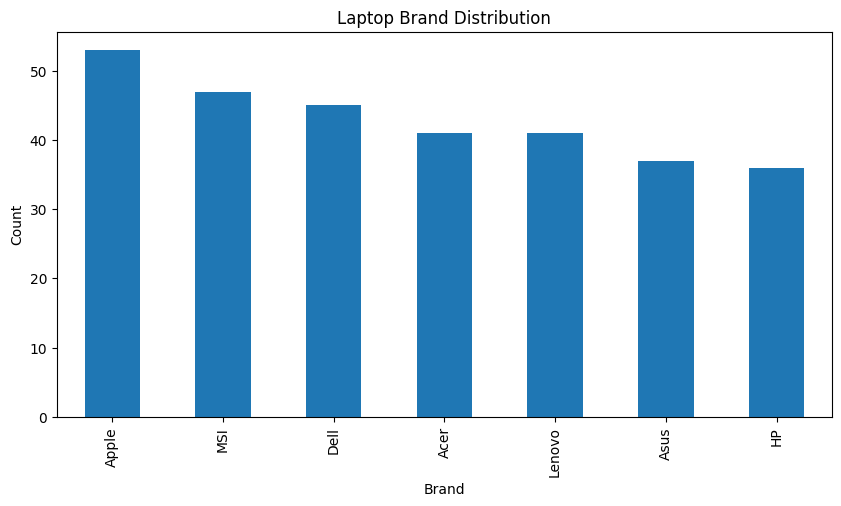

In [7]:
df['Company'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Laptop Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


### Observation
Most laptops in the dataset belong to a few major brands such as Dell, HP, and Lenovo.


## 🧠 RAM Distribution Analysis


## Purpose: This bar chart visualizes the distribution of RAM sizes across laptops, helping identify the most common memory configurations in the dataset.

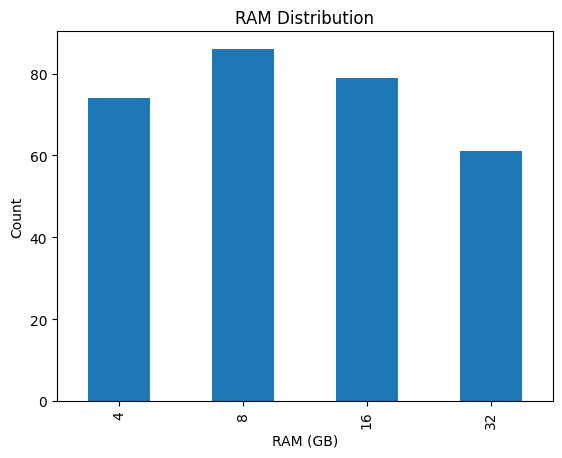

In [8]:
df['Ram'].value_counts().sort_index().plot(kind='bar')
plt.title('RAM Distribution')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()


### Observation
8GB and 16GB RAM configurations are the most common in the dataset.


## 💻 Operating System Distribution


## Purpose:
This bar chart visualizes the distribution of operating systems across laptops, helping understand which platforms are most commonly used.

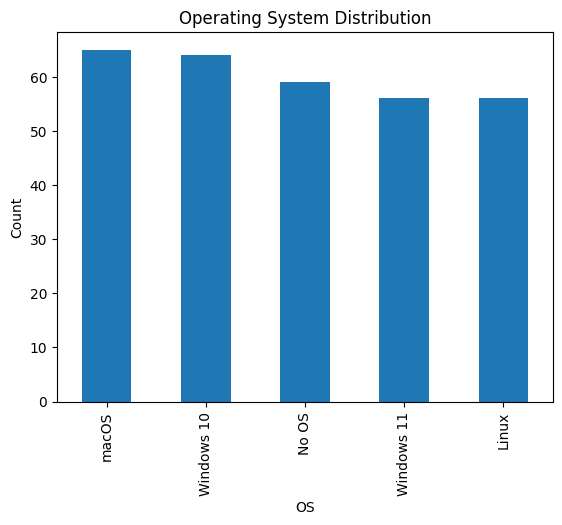

In [9]:
df['OS'].value_counts().plot(kind='bar')
plt.title('Operating System Distribution')
plt.xlabel('OS')
plt.ylabel('Count')
plt.show()


### Observation
Windows-based laptops dominate the dataset, while macOS devices are fewer but present.


## 📱 Touchscreen Distribution


## Purpose: This pie chart shows the proportion of laptops with and without touchscreen functionality in the dataset.

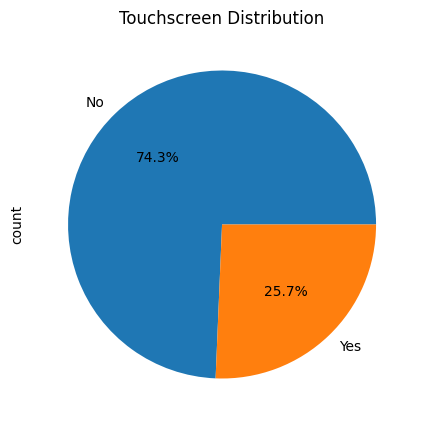

In [10]:
df['Touchscreen'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(5,5)
)
plt.title('Touchscreen Distribution')
plt.show()


### Observation
Most laptops do not have touchscreen functionality.


## 💰 Laptop Price by Brand


## Purpose: This boxplot visualizes the price distribution of laptops across different brands, highlighting price ranges, medians, and outliers.

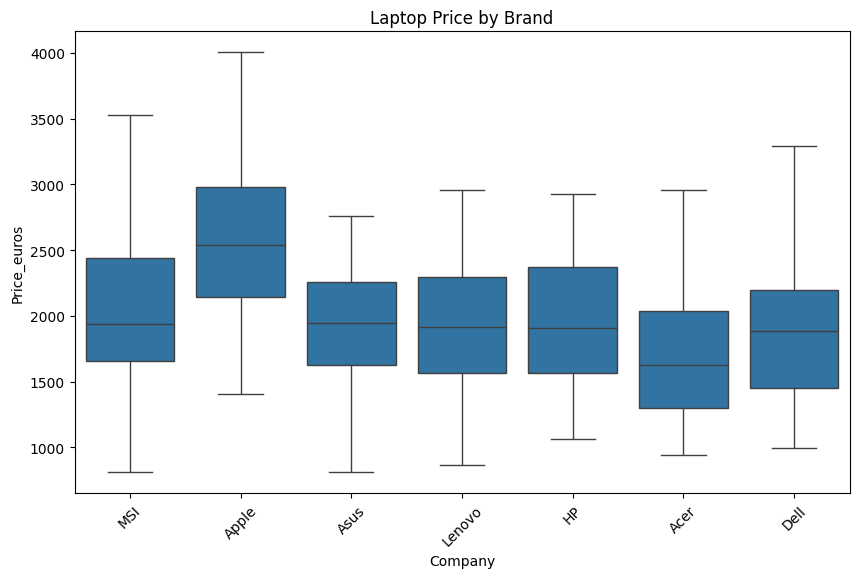

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.xticks(rotation=45)
plt.title('Laptop Price by Brand')
plt.show()


### Observation
Laptop prices vary significantly by brand. Premium brands tend to have higher median prices.


## 💾 Price vs RAM Analysis


## Purpose: This bar chart shows how average laptop prices change with different RAM configurations.

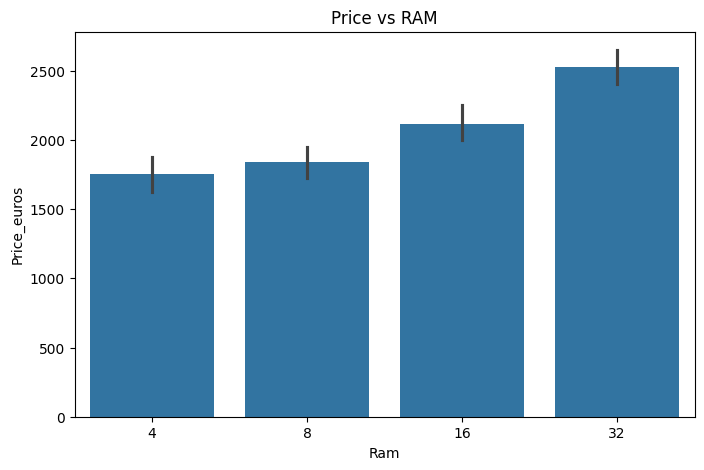

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='Ram', y='Price_euros', data=df)
plt.title('Price vs RAM')
plt.show()


### Observation
Laptops with higher RAM generally have higher prices.


## 📱 Price vs Touchscreen Analysis


## Purpose:This bar chart compares the average laptop prices between touchscreen and non-touchscreen devices.

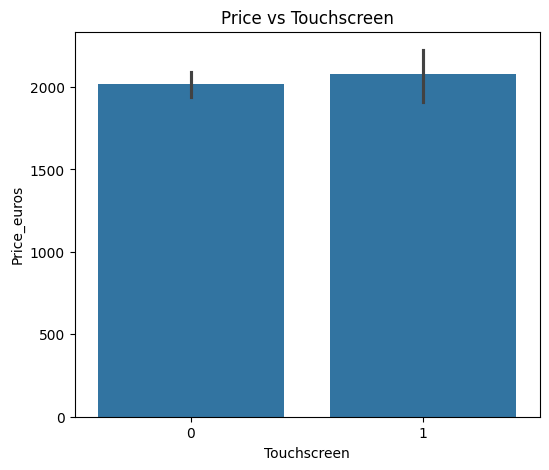

In [27]:
plt.figure(figsize=(6,5))
sns.barplot(x='Touchscreen', y='Price_euros', data=df)
plt.title('Price vs Touchscreen')
plt.show()


### Observation
Touchscreen laptops are generally priced higher than non-touchscreen laptops.


## ⚙️ CPU Frequency vs Price Analysis


## Purpose: This scatter plot examines the relationship between CPU clock speed and laptop price.

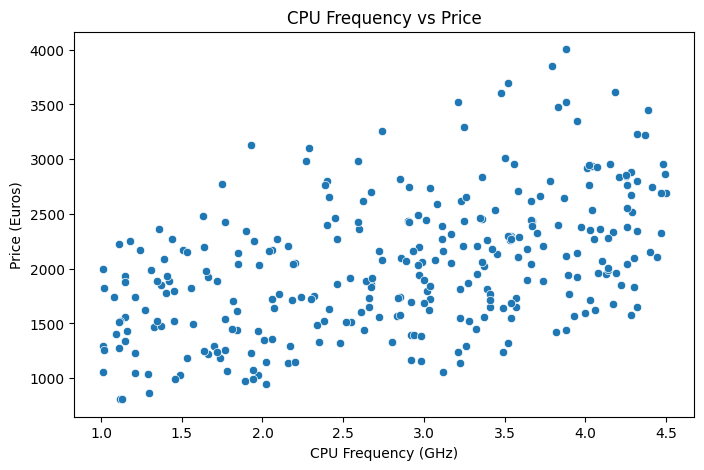

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='CPU freq', y='Price_euros', data=df)
plt.title('CPU Frequency vs Price')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Price (Euros)')
plt.show()


### Observation
Higher CPU frequency tends to correlate with higher laptop prices.


## 🛠️ Feature Engineering: Binary Encoding


## Purpose: This step converts binary categorical features into numerical values so they can be used by machine learning algorithms.

In [15]:
df['Touchscreen'] = df['Touchscreen'].map({'Yes': 1, 'No': 0})
df['IPSpanel'] = df['IPSpanel'].map({'Yes': 1, 'No': 0})
df['RetinaDisplay'] = df['RetinaDisplay'].map({'Yes': 1, 'No': 0})

df.head()


,Company,TypeName,Inches,Ram,OS,Weight,Screen,Touchscreen,IPSpanel,RetinaDisplay,CPU company,CPU freq,PrimaryStorage,Primary Storage Type,Secondary Storage,Secondary Storage Type,GPU company,Price_euros
0,MSI,Gaming,14.0,4,macOS,2.66,4K Ultra HD,0,0,0,Intel,1.12,128,Hybrid,256,NaN,Intel,808.02
1,Apple,Ultrabook,13.3,8,Windows 10,1.79,4K Ultra HD,0,0,0,Intel,4.39,1024,Hybrid,1024,Hybrid,Intel,3446.77
2,Asus,Gaming,15.6,16,Windows 11,1.52,Standard,0,0,0,AMD,4.32,512,Hybrid,512,SSD,Intel,2342.29
3,MSI,Gaming,13.3,4,macOS,3.12,Full HD,1,0,0,AMD,2.80,128,SSD,256,HDD,Nvidia,1328.66
4,Lenovo,Gaming,17.3,16,Windows 11,3.46,Full HD,1,1,0,AMD,1.33,256,SSD,256,Hybrid,AMD,1469.44


### Feature Engineering
Binary features such as Touchscreen, IPS panel, and Retina display were converted into numerical format.


## 🔢 Feature Encoding using One-Hot Encoding


## Purpose: 
This step converts categorical features into numerical format using one-hot encoding so they can be processed by machine learning models.

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()


### Encoding
Categorical features were converted into numerical values using one-hot encoding.


In [ ]:
df.shape


## 📐 Dataset Shape After Encoding


In [ ]:
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

X.head(), y.head()


## 🎯 Define Features and Target Variable


### Target and Features
The dataset was divided into input features (X) and target variable (Price_euros).


## 🧪 Train–Test Split

## Purpose
To divide the dataset into training and testing sets so the model can be trained on one portion of the data and evaluated on unseen data, ensuring reliable and unbiased performance.


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((240, 30), (60, 30))

### Train-Test Split
The dataset was split into training and testing sets to evaluate model performance on unseen data.


## 🤖 Model Training – Linear Regression

## Purpose
To train a Linear Regression model on the training dataset so that it can learn the relationship between laptop features and their prices.

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Model Training
A Linear Regression model was trained using the training dataset.


In [ ]:
## 📊 Model Evaluation

## Purpose
To evaluate the performance of the trained Linear Regression model by comparing predicted laptop prices with actual prices on the test dataset.

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


### Model Evaluation
The model performance was evaluated using Mean Squared Error and R-squared score.


## 📈 Actual vs Predicted Laptop Prices

## Purpose
To visually compare the actual laptop prices with the prices predicted by the model and assess how well the model’s predictions align with real values.

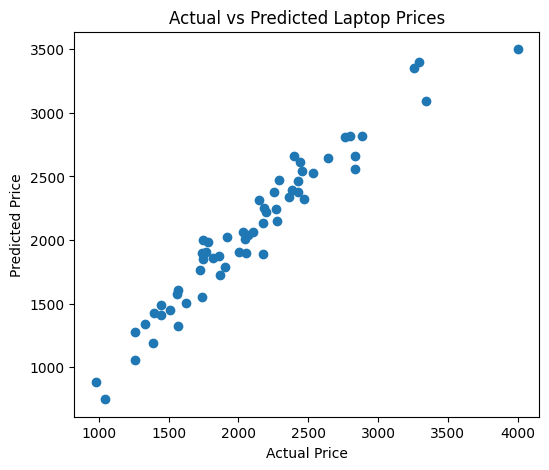

In [23]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices')
plt.show()


### Observation
The predicted prices closely follow the actual prices, indicating good model performance.


## Conclusion

In this project, laptop price data was analyzed using exploratory data analysis and machine learning techniques.
Key hardware features such as RAM, CPU frequency, storage type, and brand were found to have a strong impact on laptop pricing.
After feature engineering and encoding, a Linear Regression model was trained to predict laptop prices.
The model achieved good performance, demonstrating the effectiveness of data-driven pricing analysis.


## Future Improvements

- Use advanced models such as Random Forest or XGBoost to improve prediction accuracy
- Perform feature importance analysis
- Add a user interface for price prediction using Streamlit
- Create an interactive dashboard using Power BI or Tableau
- Use a larger real-world dataset for better generalization


In [24]:
import os

os.makedirs('../outputs', exist_ok=True)


In [25]:
import joblib

joblib.dump(model, '../outputs/Laptop Price Model.pkl')


['../outputs/Laptop Price Model.pkl']